In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from moepy import lowess, eda
from scipy.optimize import linprog
import statsmodels.api as sm

In [55]:
class ChiMayor:
    candidates = ['Kam Buckner', 'Chuy García', "Ja'Mal Green", 
        'Brandon Johnson', 'Sophia King', 'Lori Lightfoot', 
        'Raymond Lopez', 'Roderick Sawyer', 'Paul Vallas', 
        'Willie Wilson', 'Other', 'Undecided']
    # Colors based off wikipedia chart
    colors = ['#7b4a4a', '#ff9100', '#d8dc6a', 
        '#34d513', '#1fa3dd', '#ff00ff',
        '#20b2aa', '#4169e1', '#9370db', 
        '#ff0000', '#eeeeee', '#bfbfbf']
    
    def __init__(self, fp = 'wikipedia_polling_table.xlsx', frac = 1, x_end = 0) -> None:
        self.df = pd.read_excel(fp)
        electionday = np.datetime64('2023-02-28')
        self.df['date_delta'] = (self.df['StartDate']- electionday)  / np.timedelta64(1,'D')
        self.x = self.df['date_delta'].to_numpy()
        x_end = self.x.max() if x_end == -1 else x_end
        self.x_pred = np.linspace(self.x.min(), x_end, 21)
        self.model = lowess.Lowess()
        self.frac = frac


    def plot(self):
        for i, c in enumerate(self.candidates):
            y = self.df[c].to_numpy()

            self.model.fit(self.x, y, frac=self.frac)
            y_pred = self.model.predict(self.x_pred)

            c_color = self.colors[i]
            plt.scatter(self.x, y, color = c_color)
            plt.plot(self.x_pred, y_pred, '--', label = c, color = c_color)
        
        plt.title(label = 'Chicago Mayor Polling Projection')
        plt.legend(loc=(1.04, 0), title="Candidate")
        
        plt.xlabel('Days until election day (2/28/2023)')
        plt.ylabel('Polling Percentage')

    def plot2(self):
        for i, c in enumerate(self.candidates):
            y = self.df[c].to_numpy() * 100
            #print(len(y), len(self.x))
            #print(self.x)
            lowess = sm.nonparametric.lowess(endog = y, exog = self.x, frac=0.3)
            #print(lowess[:1])
            bounds = [(0, 100) for i in range(lowess.shape[0] + 1)]
            try:
                linear_model = sm.OLS(y, sm.add_constant(lowess[:,1]))\
                    .fit(method='qr', bounds=bounds)
            except Exception as e:
                print(e)
                continue
            #y_pred = linear_model.predict(self.x_pred)
            future = sm.add_constant(self.x_pred * lowess[:,1])
            y_pred = linear_model.predict(future)
            y_pred = np.clip(y_pred, 0, 100)
            
            #print(y_pred)
            #self.model.fit(self.x, y, frac=self.frac)
            #y_pred = self.model.predict(self.x_pred)

            c_color = self.colors[i]
            plt.scatter(self.x, y, color = c_color)
            plt.plot(self.x_pred, y_pred, '--', label = c, color = c_color)
        
        plt.title(label = 'Chicago Mayor Polling Projection')
        plt.legend(loc=(1.04, 0), title="Candidate")
        
        plt.xlabel('Days until election day (2/28/2023)')
        plt.ylabel('Polling Percentage')

Singular matrix


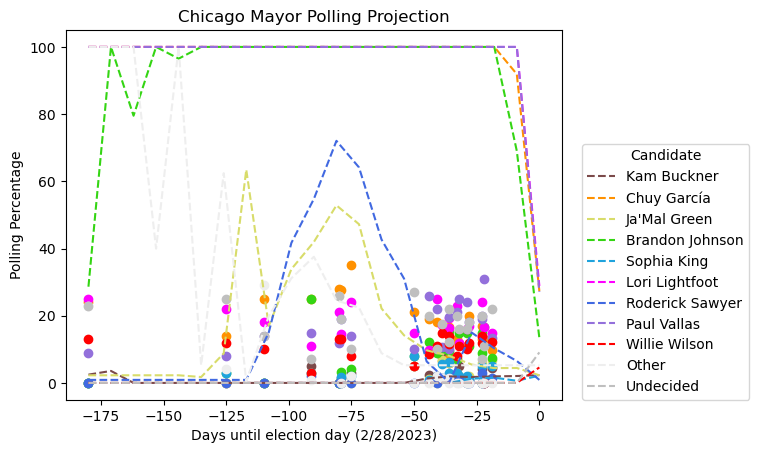

In [56]:
plot1 = ChiMayor()
#p = plot1.plot()
plot1.plot2()

In [26]:
plot1.plot2()

ValueError: endog and exog matrices are different sizes